# Notebook for accessing 1-gram server data
Notes: this will only work when connected to the UVM campus network, so use a vpn if you are off campus. 
If something seems broken send an email to mvarnold@uvm.edu, and I'll try fix it. 

To get started make sure you have an Anaconda distribution with pymongo installed using `conda install pymongo`.

In [1]:
import os
import sys
import datetime
sys.path.insert(0, os.getenv('HOME')+'/.passwords')
from mongo_password import x as pwd # password import
from mongo_query import Query
import pprint
import numpy as np
import pandas as pd
from scipy import io
from dateutil.rrule import rrule, MONTHLY
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# plotting formating
colors = '#92576A,#876C8D,#6984A2,#499BA3,#4CAD91,#79B974,#B4BF5D,#F2BE5D'.split(',')

In [2]:
# more plotting things
font = {'family' : 'serif',
        'weight' : 'normal',
        'size' : 18}

plt.rc('font', **font)

# Data Procurement

Grabs all 1-gram time series from between begin_date and end_date, that exactly match strings in word_list.
Assembles timeseries dataframes in the data dictionary. 

##### In order to connect you'll need to put the password in a protected directory `.password` in your home directory, or define `pwd` as the password.

In [7]:
# enter 1-grams to plot
word_list = ['covfefe','Trump']
data = {}

query =  Query('guest', pwd, '1grams', 'en')
for word_i in word_list:
    
    # connect to remote database
    data_i = query.query_timeseries({'word' : word_i}, word_i)
    try:
        data[word_i] = data_i
    except AttributeError:
        pass
    
print('data contains timeseries for 1grams exactly matching: ',end="")
print(*data.keys(),sep=', ')

data contains timeseries for 1grams exactly matching: covfefe, Trump


In [9]:
data[word_list[1]]

counts      rank          freq  counts_noRT  rank_noRT  \
2008-09-09       9.0   16518.5  3.133153e-06          9.0    16505.0   
2008-09-10       3.0   89817.5  3.924764e-07          3.0    89776.5   
2008-09-11      13.0   25424.5  1.700674e-06         13.0    25409.5   
2008-09-12      15.0   23270.0  1.934130e-06         15.0    23261.5   
2008-09-13      11.0   28897.0  1.469070e-06         11.0    28885.5   
2008-09-14       4.0   65020.0  5.346115e-07          4.0    65005.0   
2008-09-15      11.0   30002.5  1.370819e-06         11.0    29985.0   
2008-09-16       8.0   38772.5  1.016985e-06          8.0    38755.5   
2008-09-17      30.0   14217.5  3.837387e-06         30.0    14215.5   
2008-09-18     100.0    5647.0  1.237425e-05        100.0     5646.5   
2008-09-19      23.0   17740.0  2.783682e-06         23.0    17734.0   
2008-09-20      11.0   29850.0  1.429096e-06         11.0    29842.5   
2008-09-21      10.0   31966.0  1.288194e-06         10.0    31946.0   
2008-09-22       9.0   36197.5  1.096923e-06          9.0    36179.0   
2008-09-23      11.0   30854.0  1.379112e-06         11.0    30838.5   
2008-09-24      40.0   11525.0  5.047343e-06         40.0    11520.0   
2008-09-25      29.0   15055.5  3.570748e-06         29.0    15047.5   
2008-09-26      16.0   23117.5  1.909584e-06         16.0    23108.5   
2008-09-27      10.0   33039.0  1.244747e-06         10.0    33030.5   
2008-09-28      12.0   28499.5  1.532996e-06         12.0    28492.5   
2008-09-29      37.0   12884.0  4.367471e-06         37.0    12877.0   
2008-09-30      15.0   25364.5  1.777328e-06         15.0    25356.0   
2008-10-01      40.0   11946.0  4.812445e-06         40.0    11941.5   
2008-10-02      23.0   17941.5  2.721528e-06         23.0    17933.0   
2008-10-03       7.0   46575.5  8.136807e-07          7.0    46553.5   
2008-10-04       7.0   45034.5  8.587168e-07          7.0    45022.0   
2008-10-05       2.0  162635.0  2.572912e-07          2.0   162585.0   
2008-10-06      24.0   17821.0  2.864291e-06         24.0    17810.0   
2008-10-07       8.0   38182.5  1.090159e-06          8.0    38151.0   
2008-10-08      18.0   21885.0  2.184629e-06         18.0    21853.5   
...              ...       ...           ...          ...        ...   
2019-09-02  139340.0     178.0  5.241793e-04      19356.0      361.0   
2019-09-03  143949.0     168.0  5.425142e-04      21721.0      327.0   
2019-09-04  159862.0     162.0  5.742826e-04      23220.0      325.0   
2019-09-05  155743.0     163.0  5.701902e-04      23883.0      319.0   
2019-09-06  159269.0     159.0  5.955426e-04      23705.0      300.0   
2019-09-07  166953.0     146.0  6.509796e-04      22477.0      302.0   
2019-09-08  169396.0     145.0  6.641668e-04      23755.0      290.0   
2019-09-09  232678.0     104.0  8.801733e-04      29725.0      233.0   
2019-09-10  216954.0     109.0  8.365931e-04      31182.0      235.0   
2019-09-11  181298.0     142.0  6.675933e-04      27422.0      256.0   
2019-09-12  178493.0     136.0  6.738244e-04      28761.0      249.0   
2019-09-13  132956.0     179.0  5.229945e-04      22643.0      306.0   
2019-09-14  112680.0     197.0  4.510757e-04      18830.0      345.0   
2019-09-15  129798.0     191.0  4.974193e-04      19520.0      348.0   
2019-09-16  156469.0     168.0  5.766616e-04      24636.0      283.0   
2019-09-17  153369.0     167.0  5.705929e-04      25283.0      277.0   
2019-09-18  161297.0     163.0  5.996258e-04      26158.0      265.0   
2019-09-19  199410.0     123.0  7.485125e-04      26537.0      259.0   
2019-09-20  228608.0     102.0  8.770070e-04      29156.0      229.0   
2019-09-21  185493.0     123.0  7.460602e-04      24544.0      257.0   
2019-09-22  194843.0     126.0  7.361879e-04      27223.0      252.0   
2019-09-23  242067.0     106.0  8.693649e-04      34844.0      207.0   
2019-09-24  375809.0      80.0  1.267074e-03      57346.0      144.0   
2019-09-25  461630.0      69.0  1.563493e-03      6484

# Case Insensitive Query
Adds together counts and frequencies for each data.

A query for `'the'` would match `'the'`, `'The'`, `'THè'`, `'ThE'`, etc. 

How words are combined depends on the language: see https://docs.mongodb.com/manual/reference/collation-locales-defaults/ for more info.

In [7]:
# enter 1-grams to plot
word_list = ['covfefe','trump']
data = {}

query =  Query('guest', pwd, '1grams', 'en')
for word_i in word_list:
    
    # connect to remote database
    data_i = query.query_insensitive_timeseries({'word' : word_i}, word_i, False)
    try:
        data[word_i] = data_i
    except AttributeError:
        pass
    
n_words = len(word_list)
print(f"Grabbed time series for {n_words} 1-grams")

Grabbed time series for 2 1-grams


In [6]:
print(type(data[word_list[0]]))
#data['trump']['freq_noRT'].plot()
data['trump']

<class 'pandas.core.frame.DataFrame'>


counts     rank          freq  counts_noRT  rank_noRT  \
2008-09-09      2.0  75713.0  6.962562e-07          2.0    75675.5   
2008-09-10      9.0  34131.0  1.177429e-06          9.0    34115.0   
2008-09-11      9.0  33750.5  1.177390e-06          9.0    33730.5   
2008-09-12      5.0  55788.0  6.447101e-07          5.0    55758.5   
2008-09-13      0.0      NaN  0.000000e+00          0.0        0.0   
2008-09-14      8.0  36590.0  1.069223e-06          8.0    36574.0   
2008-09-15     10.0  32257.5  1.246199e-06         10.0    32240.5   
2008-09-16     18.0  20739.5  2.288217e-06         18.0    20726.5   
2008-09-17     12.0  28297.0  1.534955e-06         12.0    28282.0   
2008-09-18     15.0  24000.0  1.856137e-06         15.0    23997.5   
2008-09-19     14.0  25687.0  1.694415e-06         14.0    25678.5   
2008-09-20     10.0  32089.0  1.299178e-06         10.0    32081.0   
2008-09-21     14.0  24810.0  1.803471e-06         14.0    24793.5   
2008-09-22     20.0  19641.0  2.437608e-06         20.0    19632.5   
2008-09-23     13.0  27244.5  1.629859e-06         13.0    27235.0   
2008-09-24     12.0  28572.0  1.514203e-06         12.0    28559.5   
2008-09-25     18.0  21337.0  2.216326e-06         18.0    21327.5   
2008-09-26      8.0  39185.0  9.547918e-07          8.0    39170.5   
2008-09-27      7.0  43669.5  8.713226e-07          7.0    43658.0   
2008-09-28      9.0  35594.5  1.149747e-06          9.0    35588.5   
2008-09-29     22.0  18876.0  2.596875e-06         22.0    18864.5   
2008-09-30     10.0  34581.0  1.184885e-06         10.0    34565.0   
2008-10-01     16.0  23651.0  1.924978e-06         14.0    26186.0   
2008-10-02     20.0  19904.0  2.366546e-06         20.0    19892.5   
2008-10-03     23.0  18727.0  2.673522e-06         23.0    18720.0   
2008-10-04     13.0  27794.0  1.594760e-06         13.0    27786.5   
2008-10-05      9.0  35619.5  1.157811e-06          9.0    35610.5   
2008-10-06      5.0  62006.5  5.967274e-07          5.0    61960.5   
2008-10-07     18.0  19932.0  2.452859e-06         18.0    19919.5   
2008-10-08     13.0  28145.0  1.577788e-06         13.0    28104.0   
...             ...      ...           ...          ...        ...   
2019-09-02   6184.0   3565.0  2.326342e-05       3266.0     1817.0   
2019-09-03   6443.0   3497.0  2.428234e-05       3264.0     1909.0   
2019-09-04   8528.0   2857.5  3.063569e-05       3531.0     1877.0   
2019-09-05   9743.0   2447.0  3.567006e-05       3784.0     1759.0   
2019-09-06   8132.0   2860.0  3.040738e-05       3464.0     1813.0   
2019-09-07   6836.0   3255.0  2.665479e-05       3473.0     1719.0   
2019-09-08   7173.0   3058.5  2.812386e-05       3607.0     1649.0   
2019-09-09   8182.0   2768.0  3.095083e-05       4197.0     1485.0   
2019-09-10   8082.0   2754.0  3.116488e-05       4334.0     1440.0   
2019-09-11  10212.0   2320.0  3.760363e-05       3922.0     1611.0   
2019-09-12  12536.0   1881.0  4.732434e-05       4345.0     1472.0   
2019-09-13   6405.0   3335.5  2.519465e-05       3483.0     1772.0   
2019-09-14   5847.0   3569.0  2.340646e-05       2935.0     1929.0   
2019-09-15   7129.0   3093.0  2.732016e-05       2918.0     1983.0   
2019-09-16   7020.0   3297.5  2.587199e-05       3539.0     1768.5   
2019-09-17   7830.0   3003.0  2.913067e-05       3855.0     1658.0   
2019-09-18   8837.0   2714.0  3.285178e-05       3806.0     1678.0   
2019-09-19   8391.0   2745.0  3.149676e-05       3667.0     1719.0   
2019-09-20   9176.0   2481.0  3.520181e-05       3990.0     1532.0   
2019-09-21   7729.0   2797.5  3.108635e-05       3570.0     1593.0   
2019-09-22   7736.0   2904.0  2.922943e-05       3984.0     1526.0   
2019-09-23   9246.0   2630.5  3.320629e-05       4658.0     1403.0   
2019-09-24  17811.0   1492.0  6.005140e-05       8046.0      883.0   
2019-09-25  21358.0   1251.0  7.233733e-05       9000.0      795.0   
2019-09-26  23273.0   1162.0  7.959262e-05       7652.0      916.0   
2019-09-27  13083.0   2

# Plotting
Plots a simple frequency plot in linear and log space

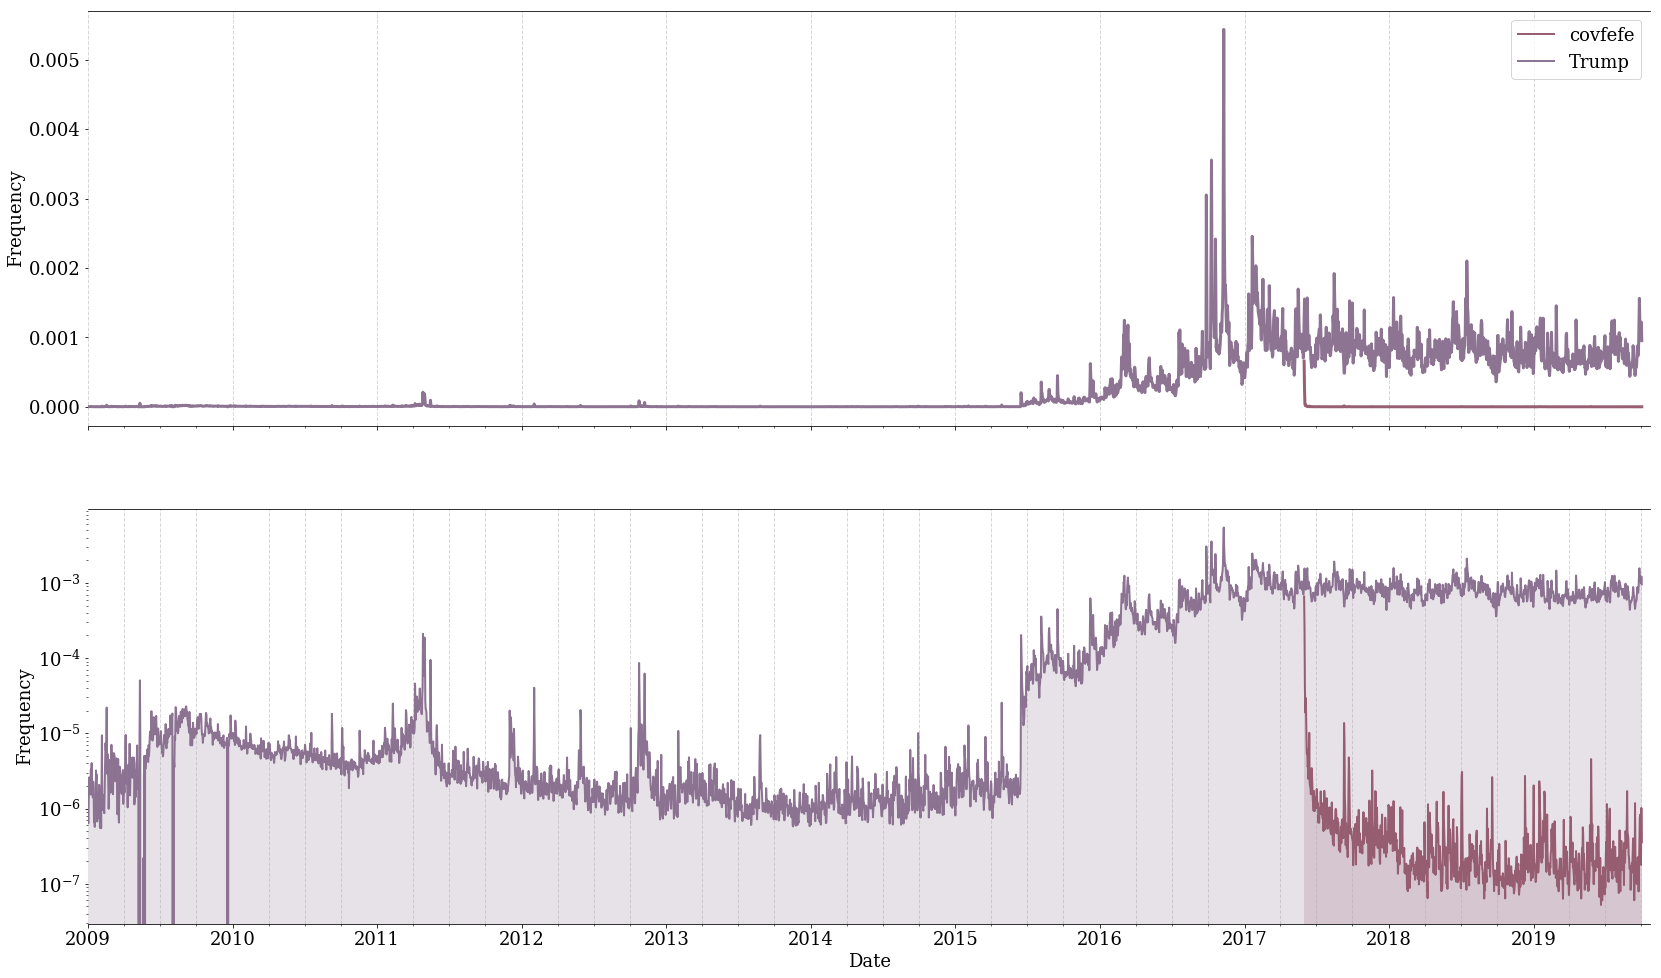

In [10]:
# %matplotlib inline
begin_date = datetime.datetime(2009,1,1)
end_date = datetime.date.today()

fig,axs = plt.subplots(2,1,figsize=(28,28*3/5), sharex=True)

# loop over selected 1-grams to plot
for i, word_i in enumerate(word_list):
    axs[0].plot(data[word_i].index, data[word_i]['freq'],lw=3, color=colors[i%len(colors)], alpha=0.95, label=word_i)
    axs[1].semilogy(data[word_i].index, data[word_i]['freq'],lw=2, color=colors[i%len(colors)], alpha=0.95, label=word_i)
    axs[1].fill_between(data[word_i].index, 0, data[word_i]['freq'], alpha=0.2, facecolor=colors[i%len(colors)], interpolate=False)

    # Struggling with plotting attributes
axs[0].set_ylabel('Frequency')
axs[1].set_ylabel('Frequency')
plt.xlabel('Date')
axs[1].grid(which='minor', axis='x',lw=1,linestyle='--',alpha=0.5)
axs[0].grid(which='major', axis='x',lw=1,alpha=0.5,linestyle = '--')
for i in range(2):
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['left'].set_visible(False)
plt.xlim(begin_date,end_date)
plt.minorticks_on()
major_ticks = np.arange(begin_date, end_date, datetime.timedelta(days=365))
axs[1].xaxis.set_major_locator(mdates.YearLocator())
plt.legend(bbox_to_anchor=(1., 2.2))
plt.show()